In [1]:
import torch
import numpy as np
import pickle
from utils import groundtruth
from utils import pde_VPINN as pde
from utils import model,tools,validation
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib as mpl
from matplotlib import cm
import matplotlib.ticker as ticker

y_L2: 0.8427087409049712


In [2]:
dtype = torch.float64


resolution = 128
val_x1=np.arange(0,1,1/resolution).reshape(-1,1)
val_x2=np.arange(0,1,1/resolution).reshape(-1,1)
t_vx1 = torch.from_numpy(val_x1).type(dtype)
t_vx2 = torch.from_numpy(val_x2).type(dtype)



#Generate grids to output graph
val_ms_x1, val_ms_x2 = np.meshgrid(val_x1, val_x2)

plot_val_x1 = np.ravel(val_ms_x1).reshape(-1,1)
plot_val_x2 = np.ravel(val_ms_x2).reshape(-1,1)
plot_val_x3 = np.zeros_like(plot_val_x1) + 0.5


t_val_vx1,t_val_vx2 = tools.from_numpy_to_tensor([plot_val_x1,plot_val_x2],[False,False],dtype=dtype)

t_val_vx3 = torch.zeros_like(t_val_vx1).type(dtype) + 0.5 
t_val_vx4 = torch.zeros_like(t_val_vx2).type(dtype) + 0.5
t_val_vx5 = torch.zeros_like(t_val_vx1).type(dtype) + 0.5
t_val_vx6 = torch.zeros_like(t_val_vx2).type(dtype) + 0.5

In [3]:
gtgen = groundtruth.gt_gen()
ms_ysol = gtgen.generate_data(gtgen.y,np.concatenate([plot_val_x1,plot_val_x2,plot_val_x3,plot_val_x3,plot_val_x3,plot_val_x3],1))
y_drm = torch.load('results/DRM_paper1/y.pt')
y_pinn = torch.load('results/PINN_t1/y.pt')
y_wan = torch.load('results/WAN/t3/solNet.pt')

In [4]:
sns.set_theme(style='white')
def plot_2D_data(fig,ax,data,title="",xlabel="",ylabel="",barlabel="",format=None,titlefs=25,labelfs=45,normminmax=None,is_colorbar = True):
    mpl.rcParams['font.size'] = titlefs
    plot_data = data.copy()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_axis_off()
    mpl.rcParams['font.size'] = labelfs
    if is_colorbar:
        if normminmax is not None:
            #im = ax.imshow(plot_data,cmap=cm.coolwarm,norm=mpl.colors.Normalize(vmin=normminmax[0], vmax=normminmax[1]))
            im = ax.pcolor(val_ms_x1,val_ms_x2,plot_data, cmap='jet',norm=mpl.colors.Normalize(vmin=normminmax[0], vmax=normminmax[1]))
            cbar = fig.colorbar(im, ax=ax, label=barlabel,shrink=1.,pad=0.03,format=format,spacing="proportional",norm=mpl.colors.Normalize(vmin=normminmax[0], vmax=normminmax[1]))        
            #cbar = fig.colorbar(im, ax=ax, label=barlabel,shrink=0.82,pad=0.03,format=format,spacing="proportional",norm=mpl.colors.Normalize(vmin=normminmax[0], vmax=normminmax[1]))
        else:
            #im = ax.imshow(plot_data,cmap=cm.coolwarm)
            im = ax.pcolor(val_ms_x1,val_ms_x2,plot_data, cmap='jet')
            cbar = fig.colorbar(im, ax=ax, label=barlabel,shrink=1.,pad=0.03,format=format,spacing="proportional")
        cbar.ax.tick_params(labelsize=labelfs)

def plot_2D_func(net,*args,**kwargs):
    pt_u = net(t_val_vx1,t_val_vx2,t_val_vx3,t_val_vx4,t_val_vx5,t_val_vx6).detach().numpy().reshape([resolution,resolution])
    plot_2D_data(data=pt_u,*args,**kwargs)

def plot_err(net,data,*args,**kwargs):
    pt_u = net(t_val_vx1,t_val_vx2,t_val_vx3,t_val_vx4,t_val_vx5,t_val_vx6).detach().numpy().reshape([resolution,resolution])
    err = np.abs(pt_u-data)
    plot_2D_data(data = err,*args,**kwargs)

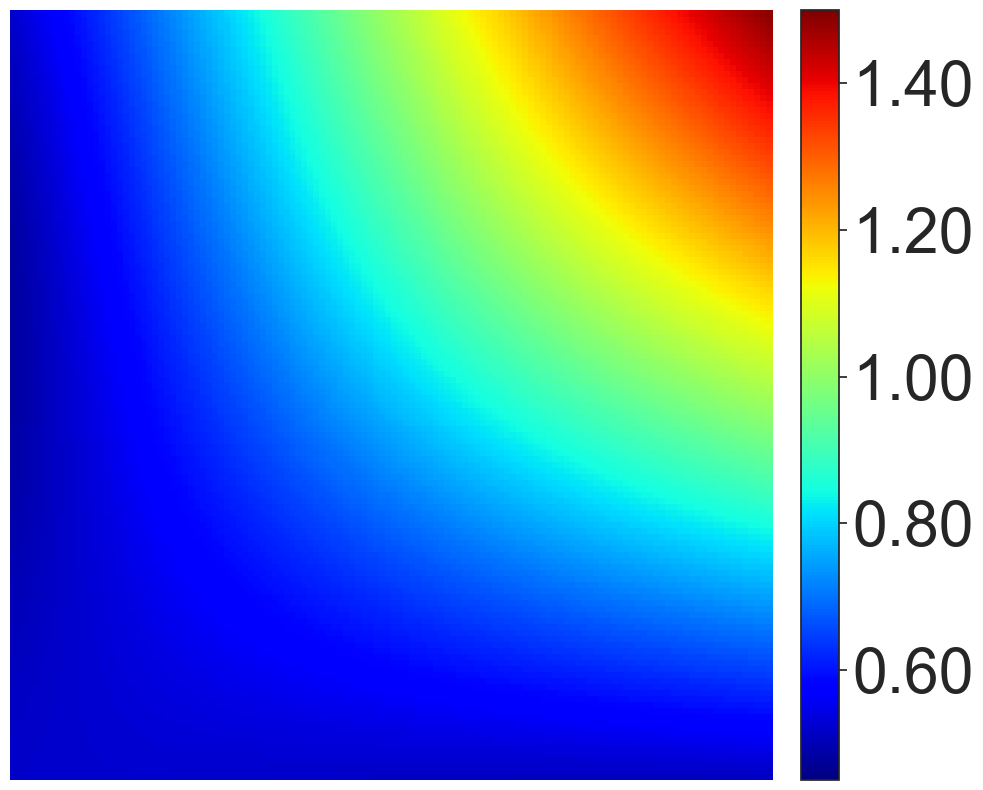

In [5]:
vmin = 0.45
vmax = 1.5
fig, ax = plt.subplots(1,1,figsize=[12,10])
plot_2D_func(y_wan,fig=fig,ax=ax,normminmax=[vmin,vmax],format='%.2f')
plt.savefig("figures/y_wan",dpi=300,bbox_inches="tight")

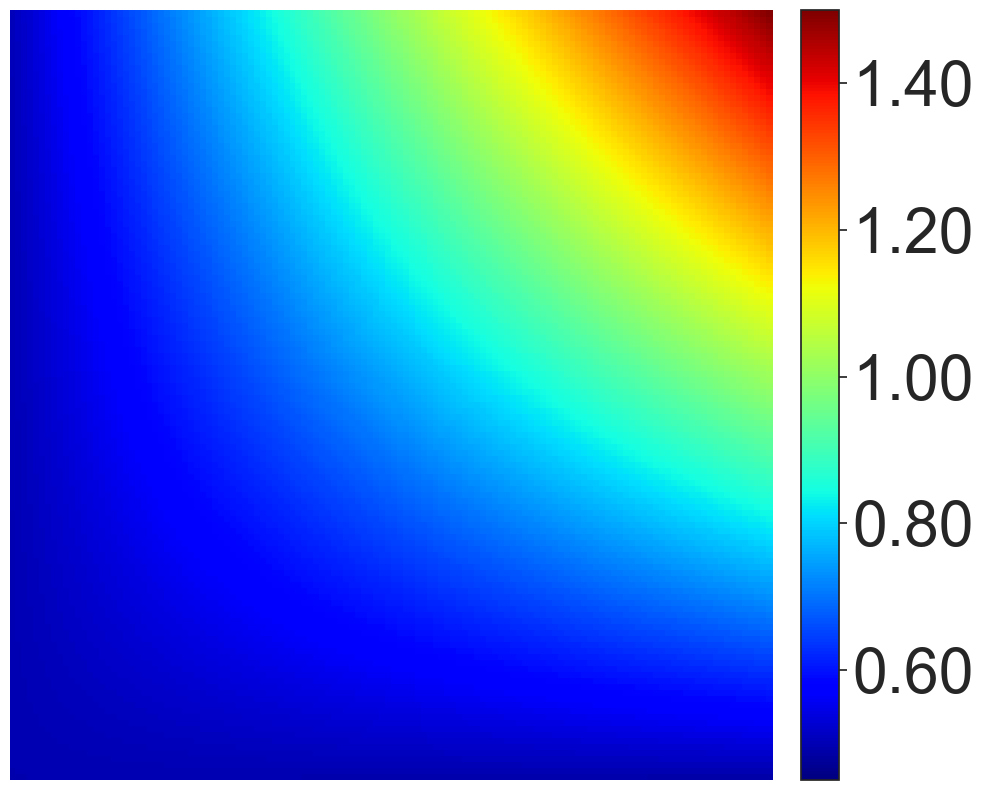

In [6]:
fig, ax = plt.subplots(1,1,figsize=[12,10])
plot_2D_func(y_pinn,fig=fig,ax=ax,normminmax=[vmin,vmax],format='%.2f')
plt.savefig("figures/y_pinn",dpi=300,bbox_inches="tight")

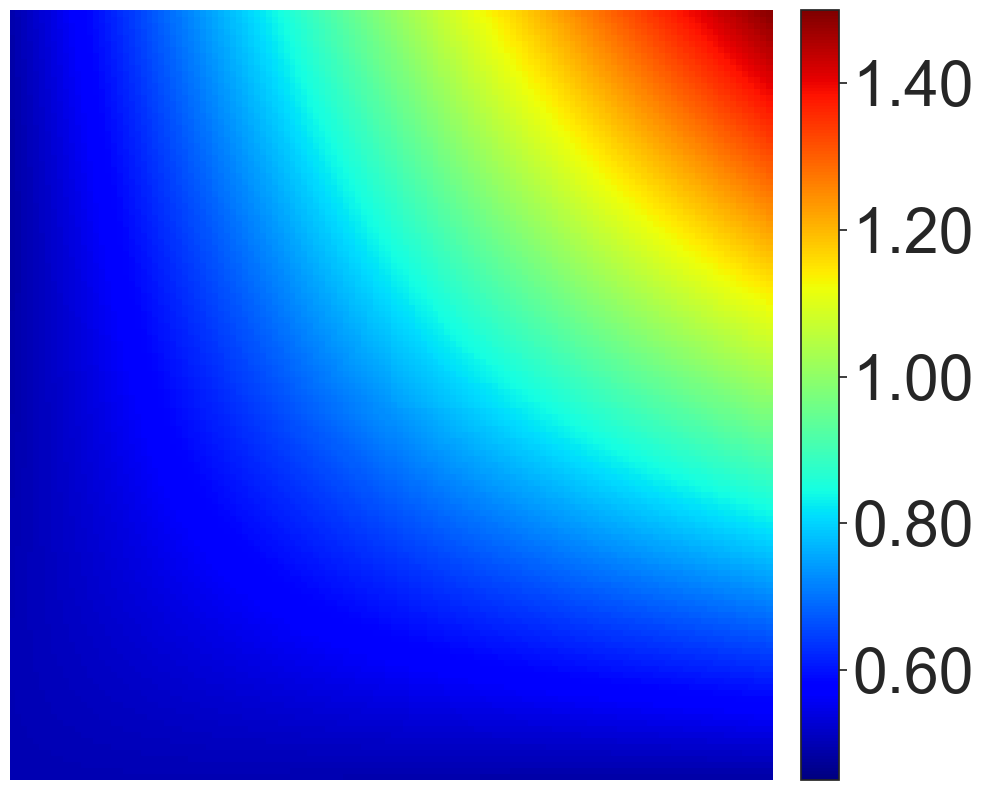

In [7]:
fig, ax = plt.subplots(1,1,figsize=[12,10])
plot_2D_func(y_drm,fig=fig,ax=ax,normminmax=[vmin,vmax],format='%.2f')
plt.savefig("figures/y_drm",dpi=300,bbox_inches="tight")

NameError: name 'y_vpinn' is not defined

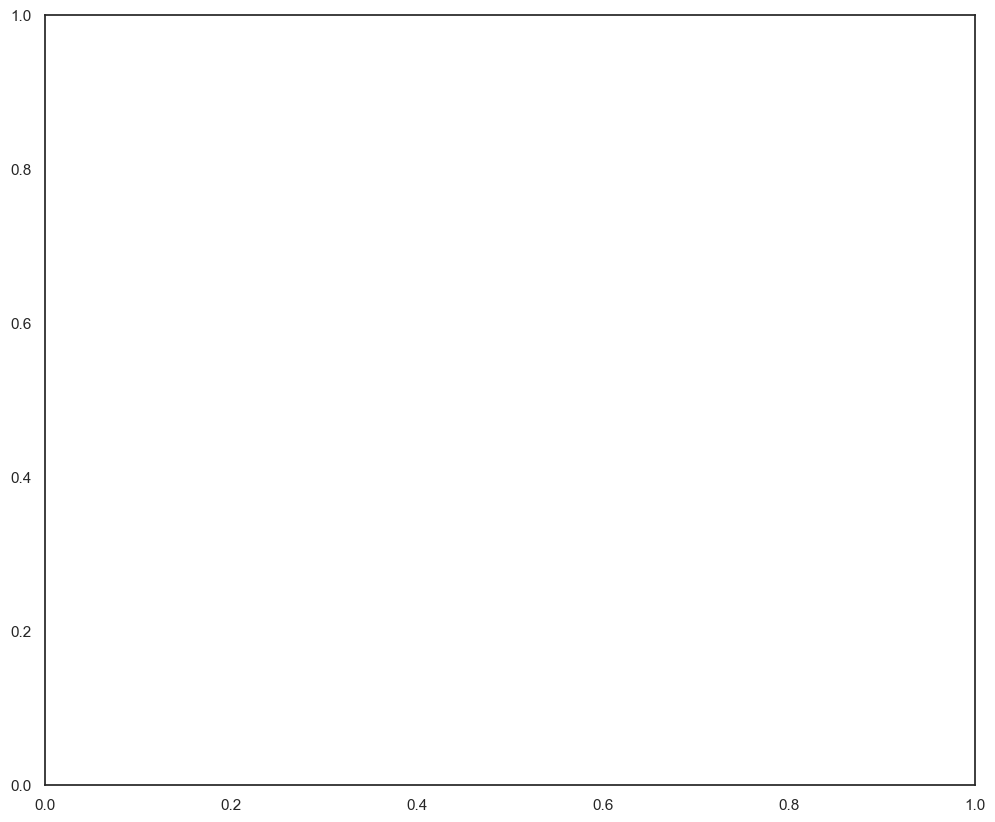

In [8]:
fig, ax = plt.subplots(1,1,figsize=[12,10])
plot_2D_func(y_vpinn,fig=fig,ax=ax,normminmax=[vmin,vmax])
plt.savefig("figures/y_vpinn",dpi=300,bbox_inches="tight")

In [ ]:
gtgen = groundtruth.gt_gen()
ygt = gtgen.generate_data(gtgen.y,np.concatenate([val_ms_x1.reshape(-1,1),val_ms_x2.reshape(-1,1),plot_val_x3,plot_val_x3,plot_val_x3,plot_val_x3],1)).reshape(resolution,resolution)


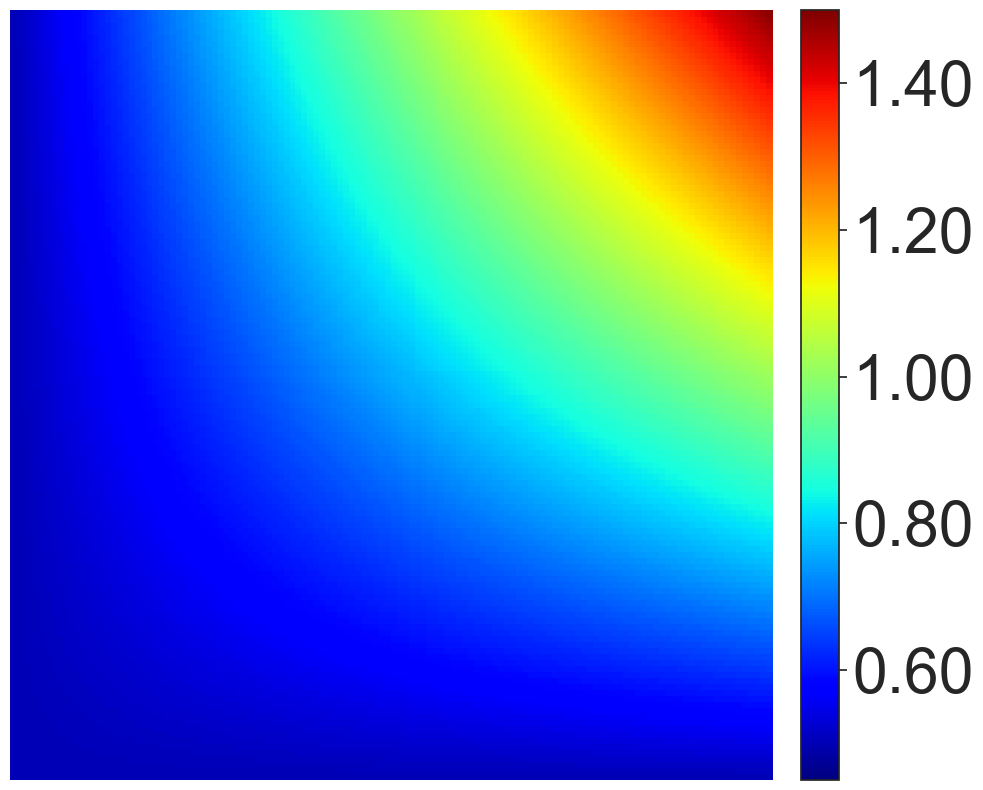

In [ ]:

fig, ax = plt.subplots(1,1,figsize=[12,10])
plot_2D_data(data=ygt,fig=fig,ax=ax,normminmax=[vmin,vmax],format="%.2f")
plt.savefig("figures/y_gt",dpi=300,bbox_inches="tight")

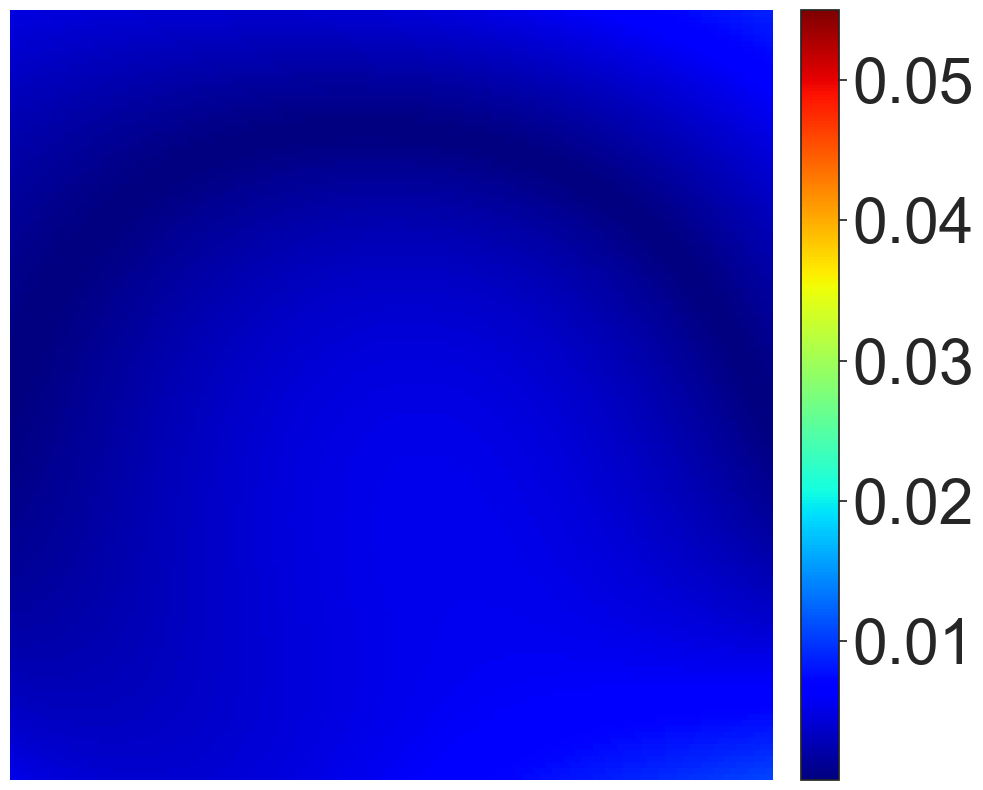

In [ ]:
vmin = 0.0001
vmax = 0.055
fig, ax = plt.subplots(1,1,figsize=[12,10])
plot_err(net=y_pinn,data=ygt,fig=fig,ax=ax,normminmax=[vmin,vmax],format="%.2f")
plt.savefig("figures/y_pinn_err",dpi=300,bbox_inches="tight")

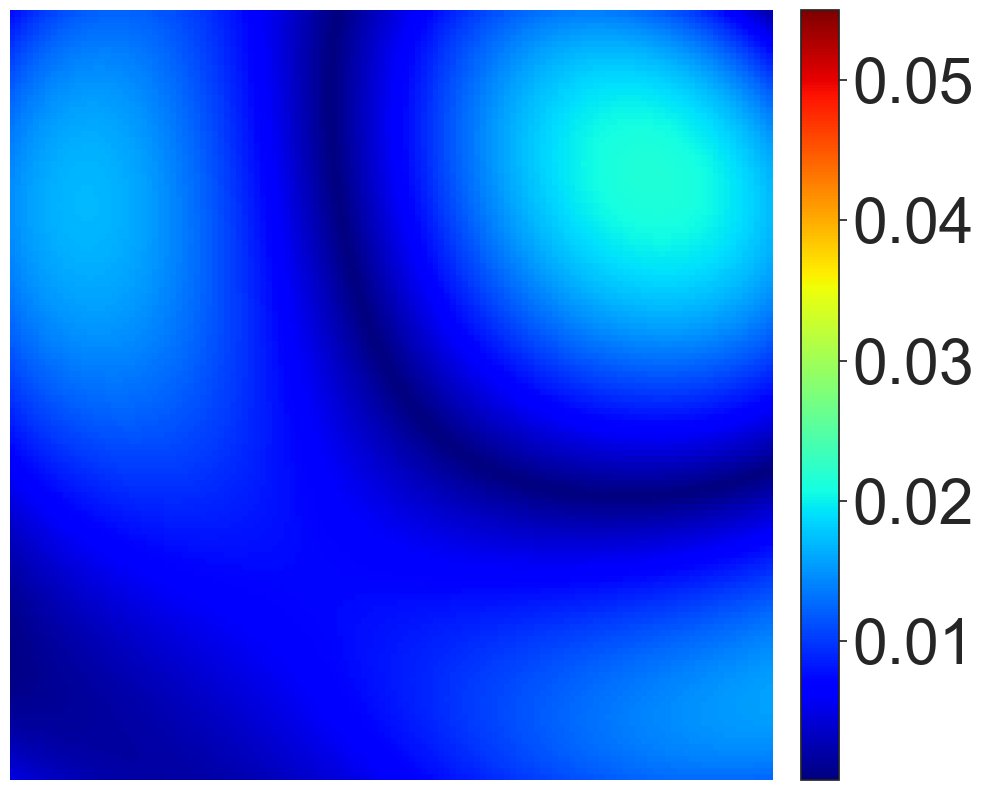

In [ ]:
fig, ax = plt.subplots(1,1,figsize=[12,10])
plot_err(net=y_drm,data=ygt,fig=fig,ax=ax,normminmax=[vmin,vmax],format="%.2f")
plt.savefig("figures/y_drm_err",dpi=300,bbox_inches="tight")

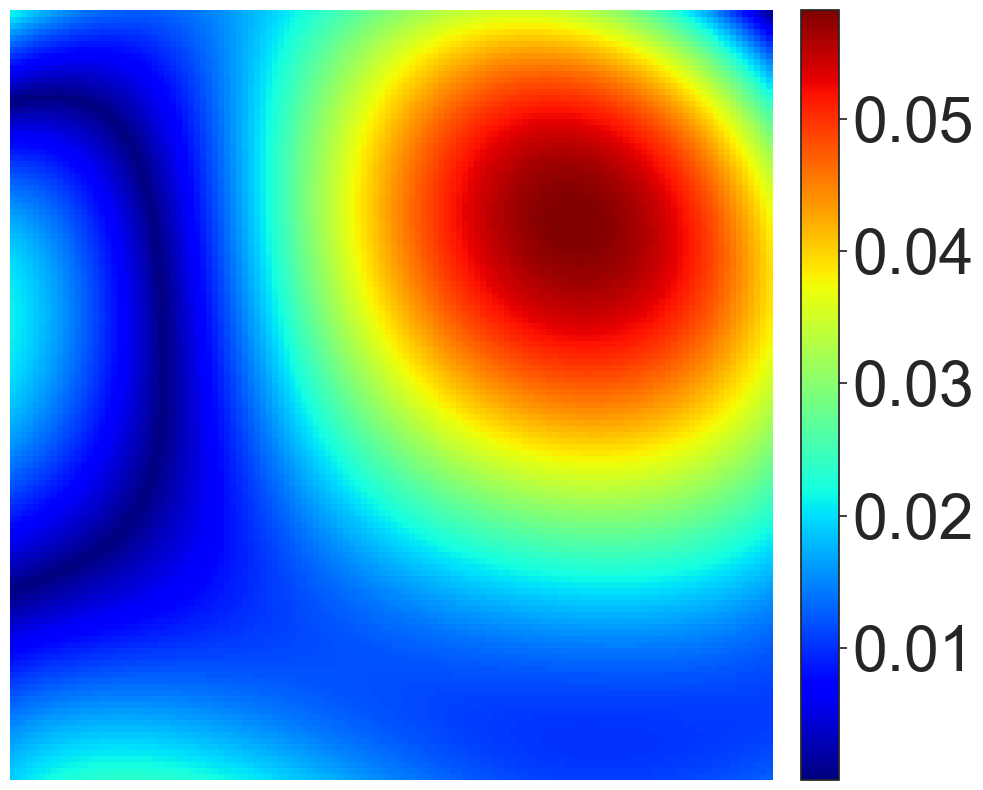

In [ ]:
fig, ax = plt.subplots(1,1,figsize=[12,10])
plot_err(net=y_wan,data=ygt,fig=fig,ax=ax)#,normminmax=[vmin,vmax],format="%.2f")
plt.savefig("figures/y_wan_err",dpi=300,bbox_inches="tight")

In [ ]:
def validate_model(model_path_list):
    validate_list = []
    for model_path in model_path_list:
        y_model = torch.load(model_path)
        val,a,b, = validation.validate(y_model)
        validate_list.append(val)
    return validate_list

model_path_list = ["results/WAN/t"+str(i)+"/solNet.pt" for i in range(1,7)]
val_list = validate_model(model_path_list)

print(val_list)

print(np.std(val_list))

In [ ]:
validation.validate(y_wan)

(0.028233127237690784,
 array([[1.25660409],
        [0.67892241],
        [0.58508342],
        ...,
        [0.34251286],
        [1.33147351],
        [0.53713416]]),
 array([[1.25496172],
        [0.67480638],
        [0.59454735],
        ...,
        [0.36188579],
        [1.3002226 ],
        [0.53889064]]))

In [ ]:
import pickle as pkl 

In [ ]:
with open("results/DRM_paper4/losshist.pkl",'rb') as f:
    lh_drm = pkl.load(f)
with open("results/DRM_paper4/vhist.pkl",'rb') as f:
    vh_drm = pkl.load(f)

with open("results/PINN_t1_withrecord/losshist.pkl",'rb') as f:
    lh_pinn = pkl.load(f)
with open("results/PINN_t1_withrecord/vhist.pkl",'rb') as f:
    vh_pinn = pkl.load(f)

with open("results/WAN/t3/losslist",'rb') as f:
    lh_wan = pkl.load(f)
with open("results/WAN/t3/vlist",'rb') as f:
    vh_wan = pkl.load(f)

In [ ]:
def fmt(x, pos):
    a, b = '{:.0e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

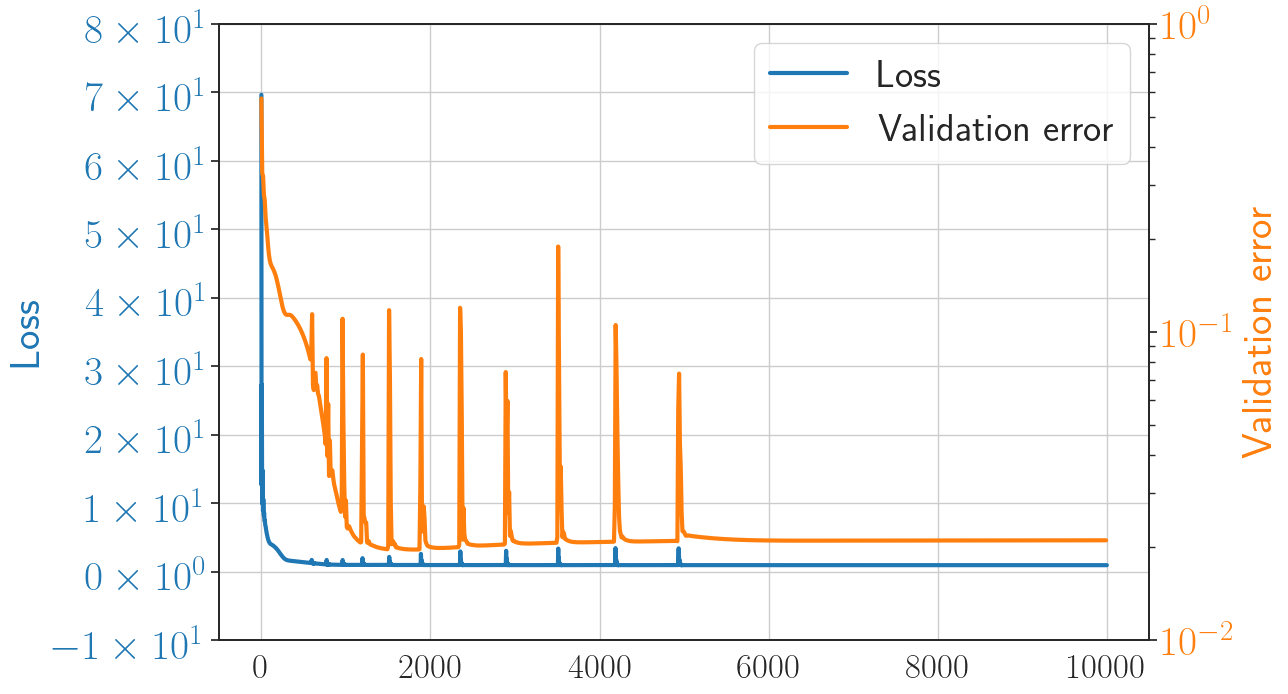

In [ ]:
fig,ax1 = plt.subplots(figsize=[12,8])
plt.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
mpl.rcParams['font.size'] = 22

color = 'tab:blue'
plt1 = ax1.plot([i for i in range(len(lh_drm))],lh_drm,linewidth = 3.0,color='tab:blue',label='Loss')
ax1.set_ylim(-10,80)

plt.grid()
plt.yticks(fontsize=25,color = 'tab:blue')
plt.xticks(fontsize=25)
plt.ylabel('Loss',fontsize=30,color = 'tab:blue')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(fmt))
#plt.xlabel("Epoch",fontsize=30)
ax2 = ax1.twinx()

color = 'tab:red'

plt2 = ax2.plot([i*10 for i in range(len(vh_drm))],vh_drm,linewidth = 3.0,color='tab:orange',label='Validation error')

ax2.set_ylim(10**(-2),1)
ax2.set_yscale('log')
plt.yticks(fontsize=30,color = 'tab:orange')
plt.ylabel('Validation error',fontsize=30,color = 'tab:orange')
plt.xticks(fontsize=25)


plots = plt1 + plt2 
labs = [l.get_label() for l in plots]
ax1.legend(plots, labs, loc=0,fontsize=28)

plt.savefig("figures/drm_hist.png",dpi=400,bbox_inches="tight")
plt.show()

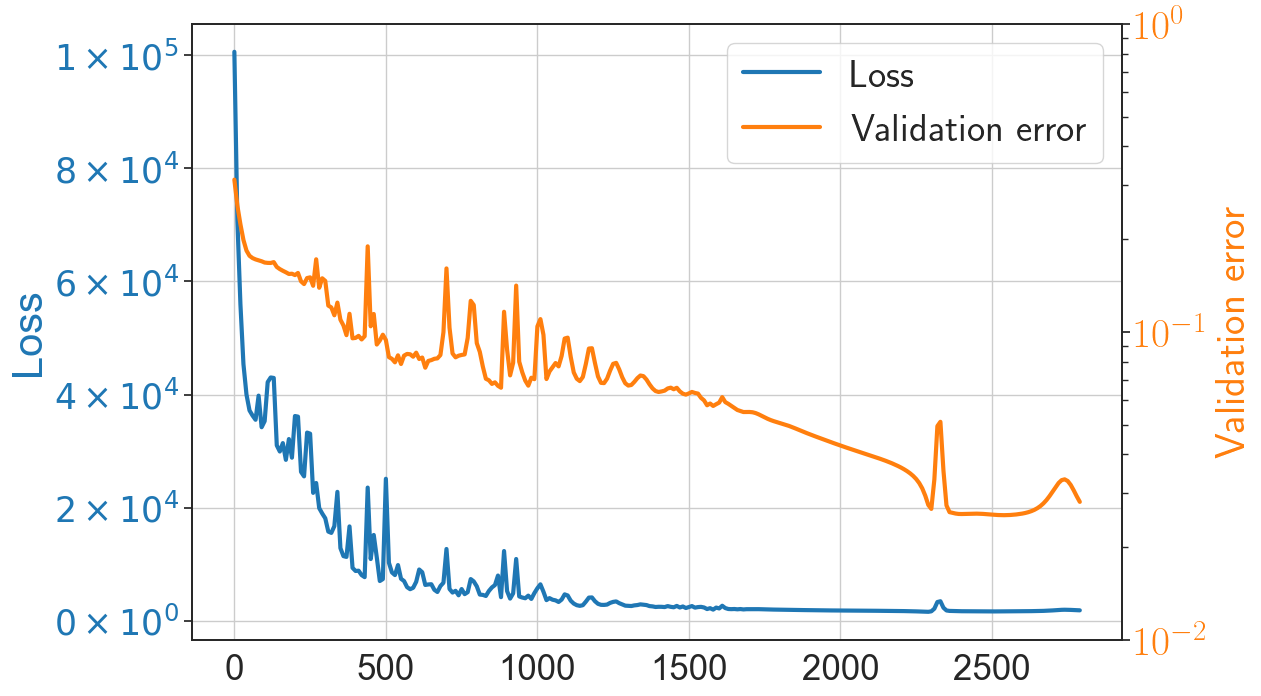

In [ ]:
fig,ax1 = plt.subplots(figsize=[12,8])
plt.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
mpl.rcParams['font.size'] = 22

color = 'tab:blue'
plt1 = ax1.plot([i*10 for i in range(len(lh_wan))],lh_wan,linewidth = 3.0,color='tab:blue',label='Loss')
#ax1.set_ylim(0,80)

plt.grid()
plt.yticks(fontsize=25,color = 'tab:blue')
plt.xticks(fontsize=25)
plt.ylabel('Loss',fontsize=30,color = 'tab:blue')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(fmt))

ax2 = ax1.twinx()

color = 'tab:red'

plt2 = ax2.plot([i*10 for i in range(len(vh_wan))],vh_wan,linewidth = 3.0,color='tab:orange',label='Validation error')

ax2.set_ylim(10**(-2),1)
ax2.set_yscale('log')
plt.yticks(fontsize=30,color = 'tab:orange')
plt.ylabel('Validation error',fontsize=30,color = 'tab:orange')
plt.xticks(fontsize=25)
plt.xlabel("Epoch",fontsize=30)

plots = plt1 + plt2 
labs = [l.get_label() for l in plots]
ax1.legend(plots, labs, loc=0,fontsize=28)

plt.savefig("figures/wan_hist.png",dpi=400,bbox_inches="tight")
plt.show()

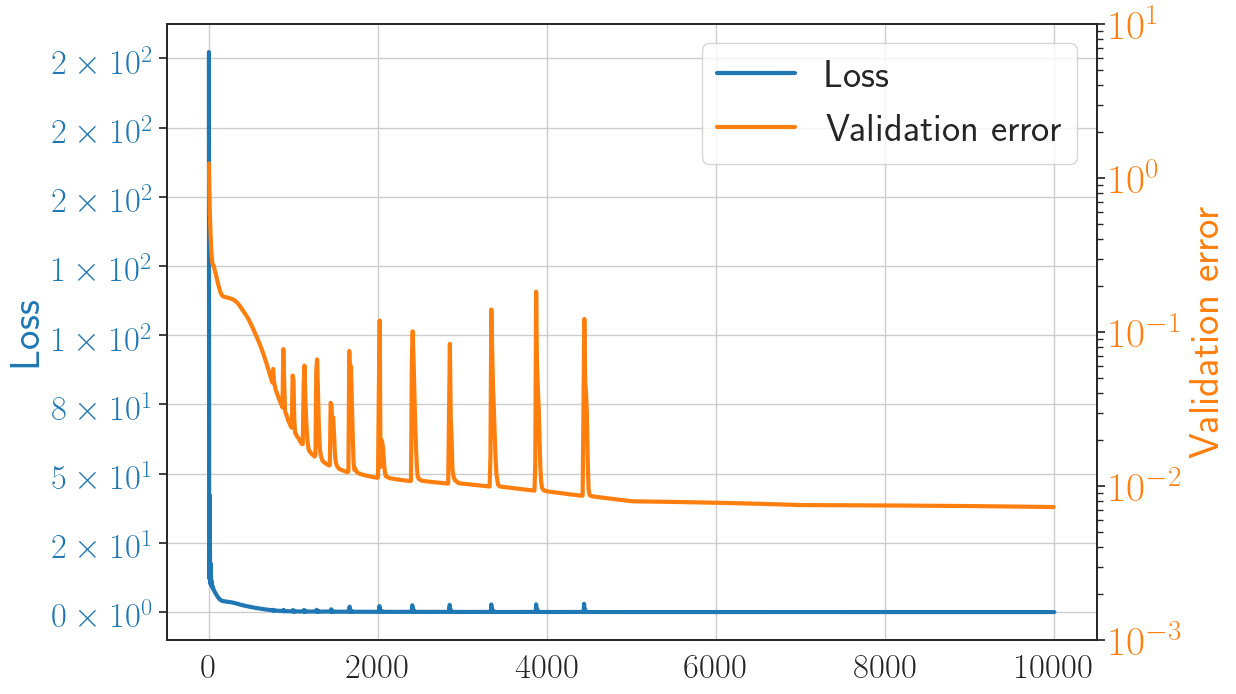

In [ ]:
fig,ax1 = plt.subplots(figsize=[12,8])
plt.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
mpl.rcParams['font.size'] = 22

color = 'tab:blue'
plt1 = ax1.plot([i for i in range(len(lh_pinn))],lh_pinn,linewidth = 3.0,color='tab:blue',label='Loss')
#ax1.set_ylim(0,80)

plt.grid()
plt.yticks(fontsize=25,color = 'tab:blue')
plt.xticks(fontsize=25)
plt.ylabel('Loss',fontsize=30,color = 'tab:blue')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(fmt))

ax2 = ax1.twinx()

color = 'tab:red'

plt2 = ax2.plot([i*10 for i in range(len(vh_pinn))],vh_pinn,linewidth = 3.0,color='tab:orange',label='Validation error')

ax2.set_ylim(10**(-3),10)
ax2.set_yscale('log')
plt.yticks(fontsize=30,color = 'tab:orange')
plt.ylabel('Validation error',fontsize=30,color = 'tab:orange')
plt.xticks(fontsize=25)
plt.xlabel("Epoch",fontsize=30)

plots = plt1 + plt2 
labs = [l.get_label() for l in plots]
ax1.legend(plots, labs, loc=0,fontsize=28)

plt.savefig("figures/pinn_hist.png",dpi=400,bbox_inches="tight")
plt.show()